[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MD_Bur1QewadIPKz1lM3NCpXMrH3hfjY?usp=sharing)

# Présentation de Random Forest
Une forêt aléatoire 🌲🌲🌲 n'est en fait qu'un groupe d'arbres de décision 🌲 regroupés (ohhhhh c'est pourquoi on l'appelle une forêt). Dans ce cahier, nous allons apprendre à créer un modèle de forêt aléatoire.

! [Forêt aléatoire] (https://www.frontiersin.org/files/MyHome%20Article%20Library/284242/284242_Thumb_400.jpg)

## Agenda
* À propos de l'ensemble de données
* Chargement des bibliothèques
*  Chargement des données
* Comprendre les données
* Séparation des fonctionnalités d'entrée et des fonctionnalités de sortie / cible
* Fractionnement des données en trains et ensembles de test.
* Construire le modèle
*  Prédiction
* Vérifiez les performances du modèle

## À propos de l'ensemble de données
J'espère que vous vous êtes tous souvenus de l'ensemble de données sur le vin sur lequel nous avons effectué une analyse exploratoire des données et avons également construit un modèle de régression logistique pour cet ensemble de données. Ici, nous allons prendre des données sur le vin rouge. Compte tenu de différents tests physico-chimiques, nous voulons prédire la qualité du vin dans une plage de 1 à 10.

La raison derrière la prise du même ensemble de données est que nous pouvons facilement remarquer les différences entre les modèles de régression logistique et de forêt aléatoire.

## Chargement des bibliothèques
Toutes les fonctionnalités Python ne sont pas chargées dans notre environnement de travail par défaut (même si elles sont déjà installées dans votre système). Ainsi, nous importons chaque bibliothèque que nous voulons utiliser.

En science des données, numpy et pandas sont les bibliothèques les plus couramment utilisées. Numpy est nécessaire pour les calculs tels que les moyennes, les médianes, les racines carrées, etc. Pandas est utilisé pour le traitement des données et les trames de données. Nous avons choisi des noms d'alias pour nos bibliothèques par souci de commodité (numpy -> np et pandas -> pd).

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

## Chargement des données
Le module Pandas est utilisé pour lire les fichiers. Nous avons nos données au format «.csv». Nous utiliserons la fonction 'read_csv ()' pour charger les données.

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

## Comprendre les données
Voyons à quoi ressemblent nos données.

In [3]:
# Red Wine
red_wine_data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Différents attributs
**Variables d'entrée (basées sur des tests physico-chimiques):**

* acidité fixe
* acidité volatile
*  acide citrique
* sucre résiduel
* chlorures
* dioxyde de soufre libre
* dioxyde de soufre total
*  densité
* pH
* sulfates
*  de l'alcool

**Variable de sortie (basée sur les données sensorielles):**

* qualité (score entre 0 et 10)

In [5]:
# Basic statistical details about data
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Voyons la variable cible «qualité».

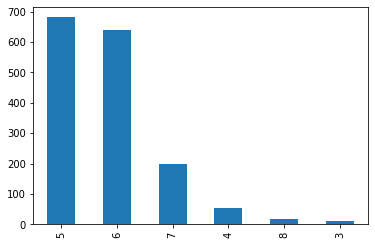

In [6]:
red_wine_data.quality.value_counts().plot(kind = 'bar')

On peut observer ici plus de vins de qualité moyenne que de mauvaise qualité et de bonne qualité. C'est ce que nous avions observé dans notre cahier EDA de données sur le vin.

Nous avons déjà fait la partie EDA de cet ensemble de données dans notre cahier précédent. Nous n'allons donc pas nous plonger davantage dans l'EDA ici. Séparons les variables indépendantes et dépendantes.

## Séparation des fonctionnalités d'entrée et des fonctionnalités de sortie
Avant de créer un modèle d'apprentissage automatique, nous séparons toujours les variables d'entrée et les variables de sortie. Les variables d'entrée sont les quantités dont les valeurs sont modifiées naturellement dans une expérience, tandis que la variable de sortie est celle dont les valeurs dépendent des variables d'entrée. Ainsi, les variables d'entrée sont également appelées variables indépendantes car leurs valeurs ne dépendent d'aucune autre quantité, et les variables de sortie sont également appelées variables dépendantes car ses valeurs dépendent d'autres variables, c'est-à-dire les variables d'entrée. Comme ici dans ces données, nous pouvons voir que le fait qu'une personne achète une assurance ou non dépend de l'âge de cette personne

Par convention, les variables d'entrée sont représentées par «X» et les variables de sortie par «y».

In [7]:
# Input/independent variables
X = red_wine_data.drop('quality', axis = 1)   # her we are droping the quality feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'

y = red_wine_data.quality             # Output/Dependent variable

## Diviser les données en train et ensemble de test
Nous voulons vérifier les performances du modèle que nous avons construit. À cette fin, nous divisons toujours (à la fois les données d'entrée et de sortie) les données données en ensemble d'apprentissage qui sera utilisé pour entraîner le modèle, et ensemble de test qui sera utilisé pour vérifier avec quelle précision le modèle prévoit les résultats.

Pour cela, nous avons une classe appelée 'train_test_split' dans le module 'sklearn.model_selection'.

In [8]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
 
# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

## Modèle de bâtiment
Maintenant, nous sommes enfin prêts et nous pouvons former le modèle.

Tout d'abord, nous devons importer notre modèle - Random Forest Classifier (encore une fois, en utilisant la bibliothèque sklearn).

Ensuite, nous alimenterions le modèle à la fois avec les données (X_train) et les réponses pour ces données (y_train)

In [10]:
# Importing RandomForestClassifier from sklearn.ensemble
# We will be further discussing about why Random Forest is in ensemble module of sklearn library
from sklearn.ensemble import RandomForestClassifier 

In [11]:
rfc = RandomForestClassifier()

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prédiction
Maintenant, le modèle Random Forest (c'est-à-dire rfc) est formé à l'aide des données X_train et y_trian. Prédisons la valeur cible (c'est-à-dire la qualité du vin) pour les données X_test. Nous utilisons la méthode "predire ()" pour la prédiction.

In [13]:
predictions = rfc.predict(X_test)

Nous avons déjà des valeurs cibles réelles (c'est-à-dire y_test) pour X_test. Comparons y_test et la valeur prédite pour X_test par notre log_model.

In [14]:
y_test.values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [15]:
predictions

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 6,
       7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 7, 8, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5,

## Performance du modèle
Nous pouvons également vérifier la précision de notre modèle en utilisant la classe 'precision_score' de 'sklearn.metrics'.

In [16]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   8,   9,   0,   0],
       [  0,   0, 151,  42,   2,   0],
       [  0,   0,  43, 144,  13,   0],
       [  0,   0,   0,  35,  25,   1],
       [  0,   0,   0,   1,   4,   1]])

Si vous observez ici, les faux positifs de classe (au-dessus de la diagonale principale) et les faux négatifs de classe (en dessous de la diagonale principale) sont presque symétriques. Le score de précision est donc une métrique importante ici.

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, predictions)

0.66875

Vous pouvez observer que la précision est améliorée avec le modèle de forêt aléatoire. Le modèle de régression logistique a donné 54% d'exactitude et Random Forest donne 66,8% d'exactitude sur le même ensemble de données.

**Merci d'avoir lu le cahier !!!**

### Exercice

Utilisez le lien de données brutes des données d'iris: https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv

**Des exercices**

* Former un modèle de forêt aléatoire pour cet ensemble de données
* Prédire la sortie pour les données de test
* Découvrez la précision du modèle que vous avez construit.
* Notez quel modèle donne de meilleures performances.